In [1]:
import warnings
warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd


import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.DataFrame(pd.read_csv("/kaggle/input/mall-customer-segmentation/Mall_Customers.csv"))
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


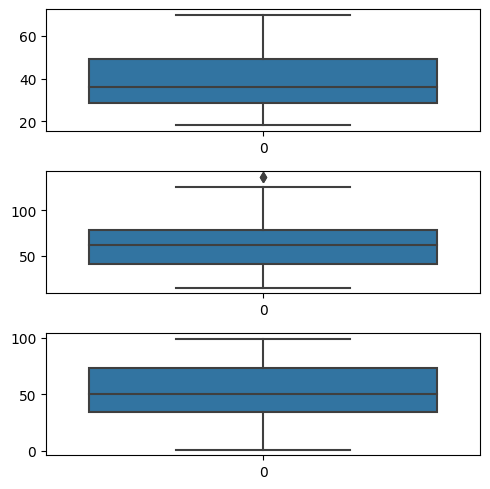

In [6]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['Age'], ax = axs[0])
plt2 = sns.boxplot(df['Annual Income (k$)'], ax = axs[1])
plt3 = sns.boxplot(df['Spending Score (1-100)'], ax = axs[2])
plt.tight_layout()

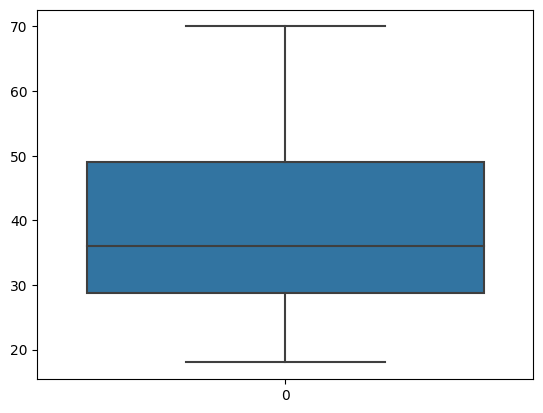

In [7]:
sns.boxplot(df['Age'])
plt.show()

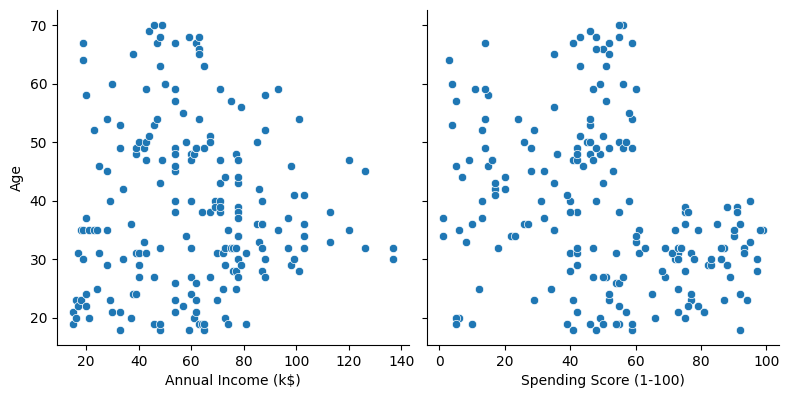

In [8]:
sns.pairplot(df, x_vars=['Annual Income (k$)', 'Spending Score (1-100)'], y_vars='Age', height=4, aspect=1, kind='scatter')
plt.show()

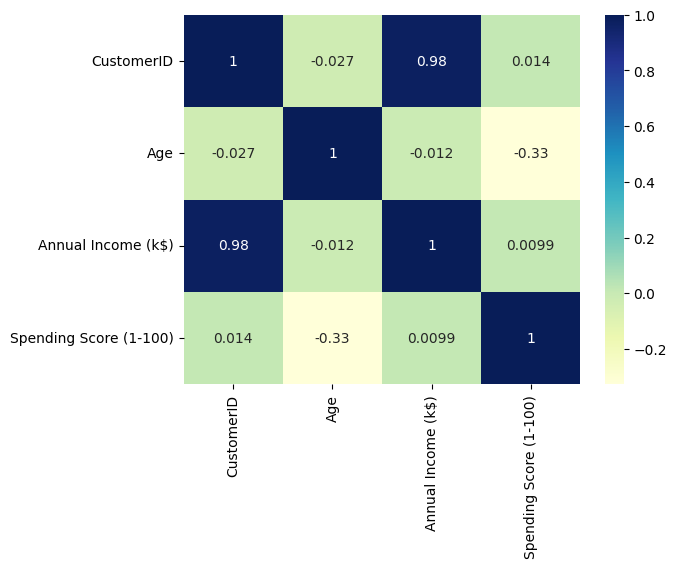

In [9]:
df2 = df.select_dtypes(include=['number'])
sns.heatmap(df2.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [10]:
df = df.drop(columns="Gender")
df = df.drop(columns="CustomerID")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     200 non-null    int64
 1   Annual Income (k$)      200 non-null    int64
 2   Spending Score (1-100)  200 non-null    int64
dtypes: int64(3)
memory usage: 4.8 KB


In [11]:
X = df.drop(columns="Spending Score (1-100)")
y = df['Spending Score (1-100)']


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.5, test_size = 0.5, random_state = 100)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     200 non-null    int64
 1   Annual Income (k$)      200 non-null    int64
 2   Spending Score (1-100)  200 non-null    int64
dtypes: int64(3)
memory usage: 4.8 KB


In [15]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [16]:
X_train.head()
y_pred = model.predict(X_test)
mse= mean_squared_error(y_test,y_pred)
print(y_pred)

[46.53785013 43.54391914 55.60434378 43.85333806 56.13041365 51.52773511
 37.85798586 44.27108245 50.03422619 49.88729549 44.3719177  54.83857524
 46.74701086 45.24601172 51.4966201  48.6813119  47.52084669 54.14252694
 52.09241021 53.50755453 47.06334293 38.29877797 52.54818277 52.68762325
 52.6259703  39.85393985 51.60494558 35.59121818 50.04229348 48.10050222
 44.36385042 55.73571698 48.58796686 57.10534292 48.6576871  46.87031677
 40.30222219 50.32866467 43.69891713 43.52836163 50.32866467 48.24743293
 53.67061981 52.54126962 52.0221129  41.93459453 52.71873827 45.51624834
 52.61790301 52.5337794  35.56010316 49.00571125 56.23873912 36.93721932
 41.00633777 52.69511347 52.99012902 46.22843121 46.4992449  52.81957352
 38.93317332 51.91378743 53.48508387 43.37336364 35.44428747 47.79108331
 47.70580556 49.59343408 43.39698843 36.9141716  34.21410202 42.29817618
 50.67668882 41.54047493 42.9095238  44.77410459 55.54326789 33.69552237
 47.33415661 50.2203392  37.50938464 47.1716684  43

In [17]:
print(y_pred)


[46.53785013 43.54391914 55.60434378 43.85333806 56.13041365 51.52773511
 37.85798586 44.27108245 50.03422619 49.88729549 44.3719177  54.83857524
 46.74701086 45.24601172 51.4966201  48.6813119  47.52084669 54.14252694
 52.09241021 53.50755453 47.06334293 38.29877797 52.54818277 52.68762325
 52.6259703  39.85393985 51.60494558 35.59121818 50.04229348 48.10050222
 44.36385042 55.73571698 48.58796686 57.10534292 48.6576871  46.87031677
 40.30222219 50.32866467 43.69891713 43.52836163 50.32866467 48.24743293
 53.67061981 52.54126962 52.0221129  41.93459453 52.71873827 45.51624834
 52.61790301 52.5337794  35.56010316 49.00571125 56.23873912 36.93721932
 41.00633777 52.69511347 52.99012902 46.22843121 46.4992449  52.81957352
 38.93317332 51.91378743 53.48508387 43.37336364 35.44428747 47.79108331
 47.70580556 49.59343408 43.39698843 36.9141716  34.21410202 42.29817618
 50.67668882 41.54047493 42.9095238  44.77410459 55.54326789 33.69552237
 47.33415661 50.2203392  37.50938464 47.1716684  43

In [18]:

print(X_test)


     Age  Annual Income (k$)
126   43                  71
104   49                  62
99    20                  61
92    48                  60
111   19                  63
..   ...                 ...
54    50                  43
25    29                  28
21    25                  24
48    29                  40
9     30                  19

[100 rows x 2 columns]


In [19]:
y_pred2 = model.predict(pd.DataFrame({'Age': [20], 'Annual Income (k$)': [20]}))
print(y_pred2)

[53.38367155]


In [20]:
mse = mean_squared_error(y_test,y_pred)
print("Mean Squared Error (MSE): ",mse)

Mean Squared Error (MSE):  576.9565001017592
